# Offensive language and hate speech detection on social medai using Deep learning

> Indented block


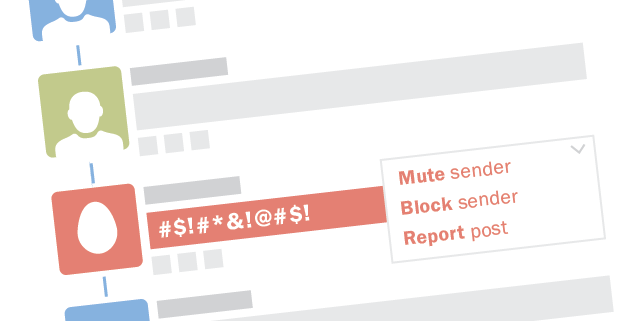




### Notebook created by Mohamed BERRIMI [twitter](https://twitter.com/mouhamedberrimi)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Google Colab 
Is  a free cloud service provided by Google for collaborative research in Machine learning , offers many features: 

    - [ ] Google Colab provides a single 12GB NVIDIA Tesla T4 GPU || Tesla K80 that can be used up to 12 hours continuously
    - [ ] Jupyter notebook Layout style < cells , texts , versions ..> 
    - [ ] You can access your Drive dataset, Kaggle and can clone your github repos and data
    - [ ] Also provides CPU and TPU 
    - many other features..


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Arabic Data 
نستخدم مجموعة البيانات المتاحة للكشف عن الكلام الذي يحض على الكراهية ، وقد تم الحصول على مجموعة البيانات هذه من التعليقات المحذوفة من الجزيرة.كوم وهي وسيلة إخبارية عربية شائعة ، وتدير محتواها ، وتشير إرشاداتها إلى أنه سيتم إزالة التعليقات إذا كانت تحتوي على هجوم شخصي ، عنصري ، التحيز الجنسي ، أي شكل من أشكال الهجوم.

حصل المؤلفون في البداية على ما يصل إلى 400 ألف تعليق على ما يقرب من 10 آلاف من المقالات التي تغطي العديد من المجالات. بعد ذلك ، تم تحديد 32 الف تعليقات محذوفة عشوائيًا يتراوح طولها بين 3 و 200 حرفًا لتخفيف التعليقات التوضيحية اللاحقة. تم التعليق على التعليقات المحددة باستخدام CrowdFlower ، حيث طُلب من ثلاثة من المعلقين تصنيف التعليقات على أنها فاحشة أو مسيئة أو نظيفة.


---







### Where you can get more data:


*   https://datasets.quantumstat.com/
*   http://hatespeechdata.com/



### PLEASE MAKE SURE TO IMPORT THE DATASET from the link so you can run the code properly .

The dataset was mentioned on this paper: https://www.research.ed.ac.uk/portal/files/40852252/W17_3008.pdf

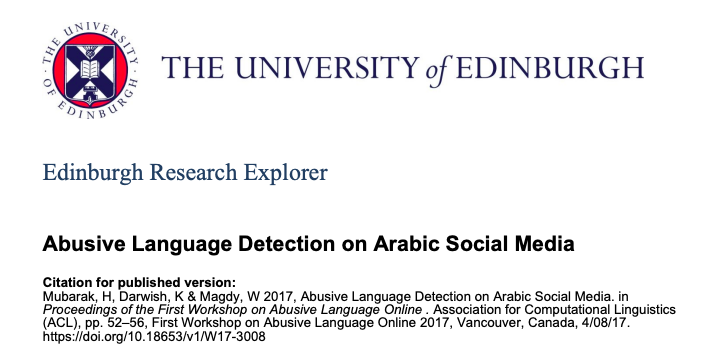

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd 

data= pd.read_excel('https://drive.google.com/file/d/1FOSEVDKswe1xlIykXFSmvVxb_GVTG0GR/view?usp=sharing/')

XLRDError: ignored

In [ ]:
data.head()

In [ ]:
df=data.drop(['_unit_id','_trusted_judgments','languagecomment:confidence','articletitle','_golden','_unit_state','_last_judgment_at','insdt','languagecomment_gold','link','serial'],axis=1)

In [ ]:
data[data.languagecomment.isin([0])]

In [ ]:
df[df.languagecomment.isin([0])]

In [ ]:
df.languagecomment.value_counts()

In [ ]:
df.bodylen.value_counts()

In [ ]:
df.count()

In [ ]:
labels={ -1:1, -2:1 , 0:0 }
## Label : 1 represents Toxic comemnts (Hate speech and offensive speech)
## Label : 0 represents Normal texts.

df['languagecomment'].replace(labels,inplace=True)


In [ ]:
df.languagecomment.value_counts()

## Preprocessing the dataset

The online twitts and comments are highly unstructered, they contains special charcters, emojis, links..etc
All this noise needs to be removed and normalized, because it could have bad effects on the model performance.


** Removing diacritics: *إزالة علامات التشكيل* **

عادةً ما تحتوي النصوص العربية على علامات تشكيل مرتبطة بكل حرف ، ولا يستخدمها الجزء الأكبر من مستخدمي وسائل التواصل الاجتماعي ، ولكن يمكن أن توجد في بعض النصوص ، وفقًا لمجموعة ستانفورد ، فمن الأفضل إزالتها .

https://nlp.stanford.edu/IR-book/html/htmledition/accents-and-diacritics-1.html

In [ ]:
!pip install  alphabet_detector 


  Created wheel for alphabet-detector: filename=alphabet_detector-0.0.7-py3-none-any.whl size=2443 sha256=5debd39d2a77c50e1bfe1051859a5b8bb83bab151f3765d11d588898f763c5be
  Stored in directory: /root/.cache/pip/wheels/22/8c/ab/4afb1765f2b8450f894a1f06c9aa2b3f8e73f2fb8b55849e17
Successfully built alphabet-detector


In [ ]:
# Cleaning Data
 
import re
import string
from alphabet_detector import AlphabetDetector
from bs4 import BeautifulSoup
#define the arabic forms
arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

#remove arabic forms
def remove_diacritics(text):  #إزالة علامات التشكيل *
    text = re.sub(arabic_diacritics, '', text)
    return text

#remove punctuation
def remove_punctuation(s): 
    my_punctuations = string.punctuation + "،" + "؛" + "؟" + "«" + "»" + "!"
    translator = str.maketrans('', '', my_punctuations)
    return s.translate(translator)


def remove_punctuation2(s): # replace punctuation with space
    my_punctuations = string.punctuation + "،" + "؛" + "؟" + "«" + "»"
    replace_table = str.maketrans(my_punctuations,  ' '*len(my_punctuations))
    return s.translate(replace_table)

#remove text change from html to text
def html2text(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()


#remove other letters
def remove_links(text):
 
    return re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE)

# remove empty lines
def remove_empty_lines(text):
    lines = [s.rstrip() for s in text.split("\n") if s.rstrip()]
    return '\n'.join(lines)


def remove_repeating_char(text):
    # return re.sub(r'(.)\1+', r'\1', text)     # keep only 1 repeat
    return re.sub(r'(.)\1+', r'\1\1', text)  # keep 2 repeat

#remove any othe language letters
def keep_only_arabic(text):
    ad = AlphabetDetector()
    clean_lines = list()
    for line in text.splitlines():
        clean_line = list()
        for word in line.split():
            if len(word) > 1:
                if ad.is_arabic(word):
                    if word.isalpha():
                        clean_line.append(word)
        clean_lines.append(' '.join(clean_line))
    return '\n'.join(clean_lines)


def clean_doc(text):
    text = html2text(text)
  
    text = text.replace('\\', ' ')
    text = text.replace('/', ' ')
    text = text.replace('-', ' ')
    text = text.replace('(', ' ')
    text = text.replace(')', ' ')
    clean_text = remove_links(text)
    clean_text = remove_diacritics(clean_text)
    clean_text = remove_punctuation2(clean_text)
    clean_text = keep_only_arabic(clean_text)
    clean_text = remove_repeating_char(clean_text)
    clean_text = remove_empty_lines(clean_text)
    return clean_text


In [ ]:
text = " https://www.google.com  موعدكم اليوم 8 مساءً بتوقيت دبي للإجابة عن أسئلتكم التقنية مع عبد الرحمن عمران  😃 و سليم عبيد - مسؤول علاقات المطوروووووووون  😋  والنظام الإيكولوجي   #MENADD @abid_salim  @Omranic"
text

In [ ]:
clean_doc(text)

In [ ]:
df['body'].values.tolist()


In [ ]:
df['body'].count()

Apply clean_doc function to our text attribute

In [ ]:
df['body']= df['body'].apply(clean_doc)

In [ ]:
df['body'].values.tolist()

In [ ]:
df['body'].count()

In [ ]:
df

## Splitting our dataset

In [ ]:
trainig_sample = df.sample(26000, random_state=0)
X_train = trainig_sample['body'].astype(str).values
y_train = trainig_sample['languagecomment'].values



In [ ]:

validation_sample = df.sample(5692, random_state=42)

X_val = validation_sample['body'].astype(str).values
y_val = validation_sample['languagecomment'].values


## Machine learning experiments

> Indented block



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding



import nltk
import nltk as nlp
import string
import re


## Sickit learn:
also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms. It was introduced at Google summer of code.

In [ ]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = pipe.fit(X_train, y_train)

prediction = model.predict(X_val)
print('=================')

print('====== Logistic Regression Model Performance ===========')

print("Logistic Regression accuracy: {}%".format(round(accuracy_score(y_val, prediction)*100,2)))
print('=================')


**TF-IDF weights (expl)**
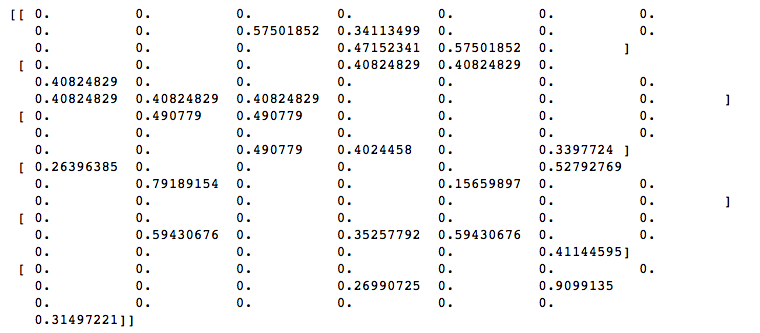

In [ ]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_val)
print('=================')

print('====== MultinomialNB Model Performance ===========')

print("MultinomialNB accuracy: {}%".format(round(accuracy_score(y_val, prediction)*100,2)))
print('=================')


# Deep learning experiments

## TensorFlow

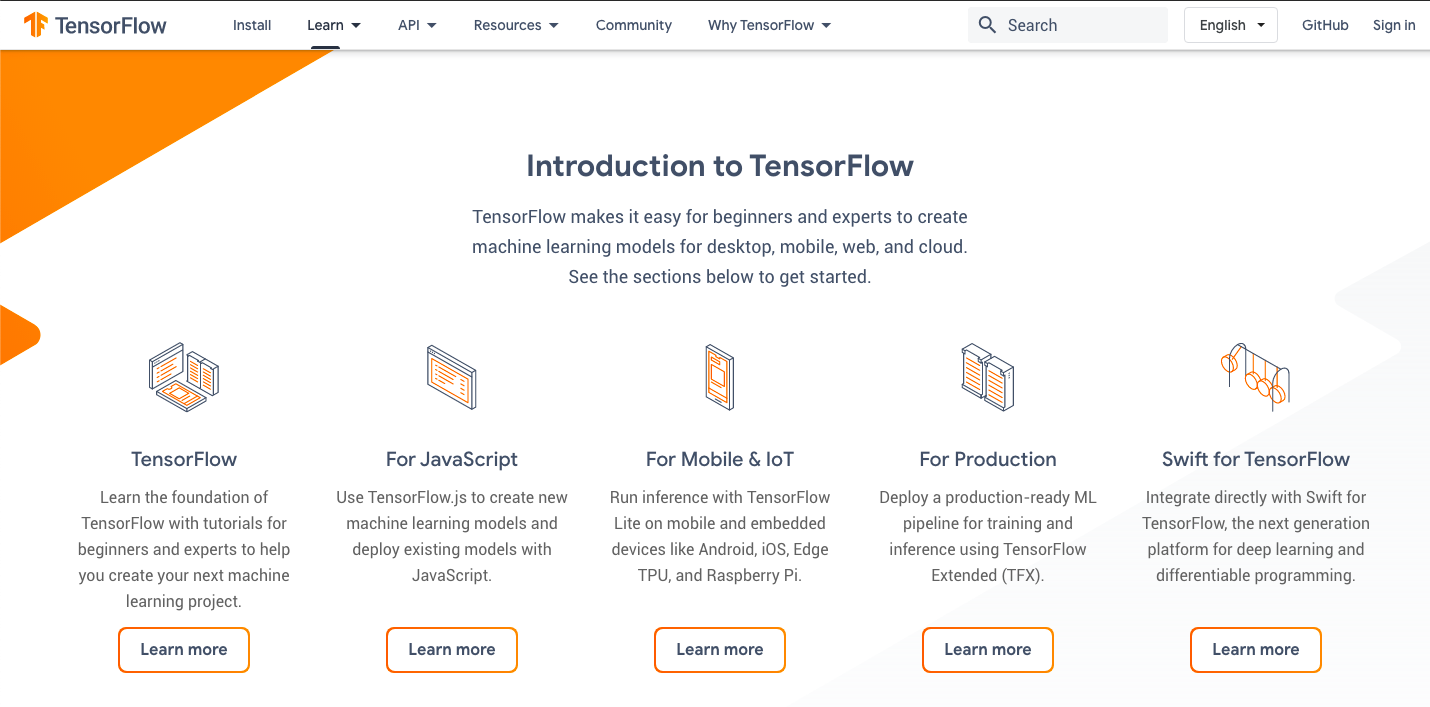

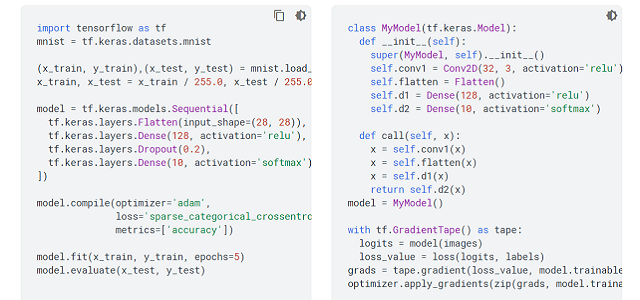

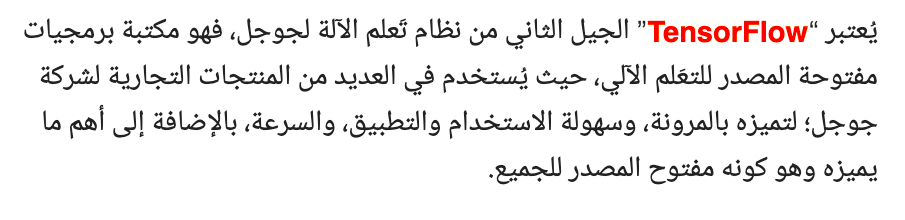

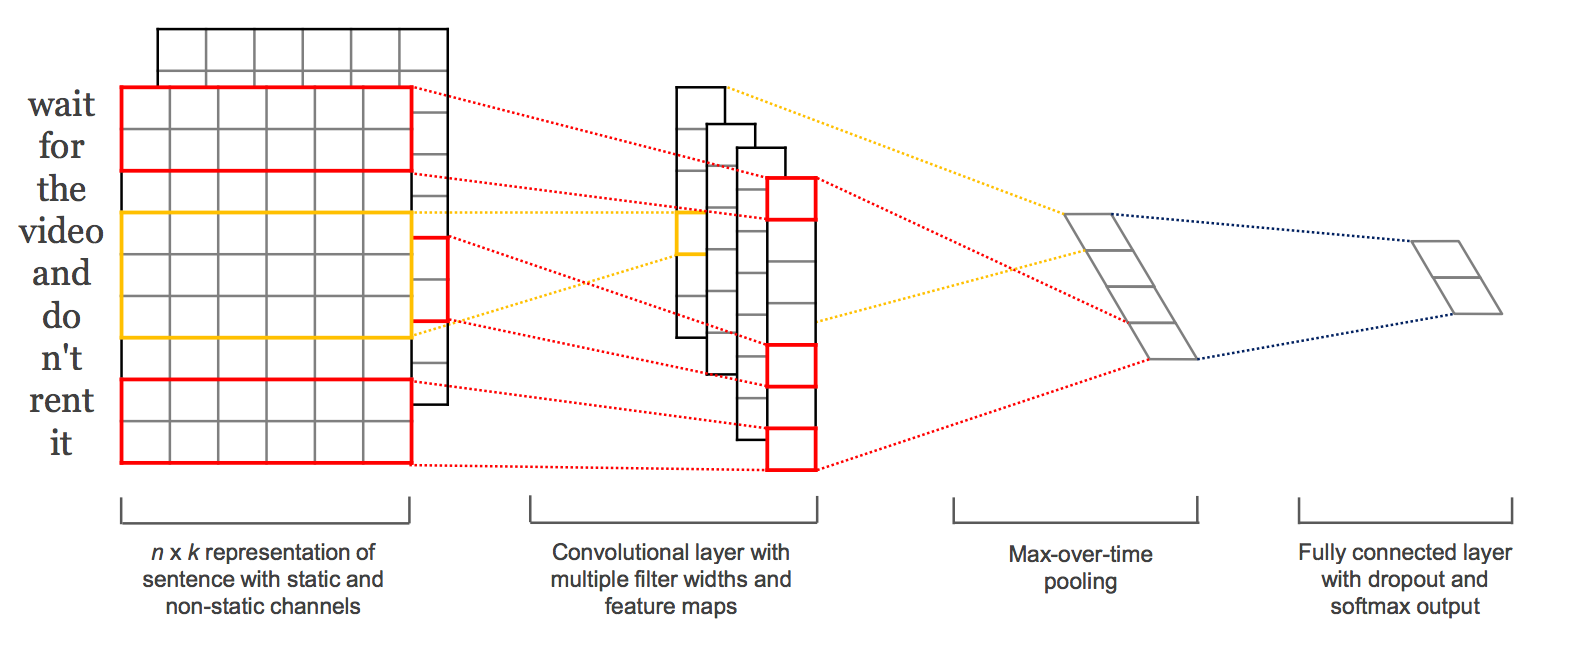

In [ ]:
import copy, numpy as np
np.random.seed(0)

# compute sigmoid nonlinearity
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

# convert output of sigmoid function to its derivative
def sigmoid_output_to_derivative(output):
    return output*(1-output)


# training dataset generation
int2binary = {}
binary_dim = 8

largest_number = pow(2,binary_dim)
binary = np.unpackbits(
    np.array([range(largest_number)],dtype=np.uint8).T,axis=1)
for i in range(largest_number):
    int2binary[i] = binary[i]


# input variables
alpha = 0.1
input_dim = 2
hidden_dim = 16
output_dim = 1


# initialize neural network weights
synapse_0 = 2*np.random.random((input_dim,hidden_dim)) - 1
synapse_1 = 2*np.random.random((hidden_dim,output_dim)) - 1
synapse_h = 2*np.random.random((hidden_dim,hidden_dim)) - 1

synapse_0_update = np.zeros_like(synapse_0)
synapse_1_update = np.zeros_like(synapse_1)
synapse_h_update = np.zeros_like(synapse_h)

# training logic
for j in range(10000):
    
    # generate a simple addition problem (a + b = c)
    a_int = np.random.randint(largest_number/2) # int version
    a = int2binary[a_int] # binary encoding

    b_int = np.random.randint(largest_number/2) # int version
    b = int2binary[b_int] # binary encoding

    # true answer
    c_int = a_int + b_int
    c = int2binary[c_int]
    
    # where we'll store our best guess (binary encoded)
    d = np.zeros_like(c)

    overallError = 0
    
    layer_2_deltas = list()
    layer_1_values = list()
    layer_1_values.append(np.zeros(hidden_dim))
    
    # moving along the positions in the binary encoding
    for position in range(binary_dim):
        
        # generate input and output
        X = np.array([[a[binary_dim - position - 1],b[binary_dim - position - 1]]])
        y = np.array([[c[binary_dim - position - 1]]]).T

        # hidden layer (input ~+ prev_hidden)
        layer_1 = sigmoid(np.dot(X,synapse_0) + np.dot(layer_1_values[-1],synapse_h))

        # output layer (new binary representation)
        layer_2 = sigmoid(np.dot(layer_1,synapse_1))

        # did we miss?... if so, by how much?
        layer_2_error = y - layer_2
        layer_2_deltas.append((layer_2_error)*sigmoid_output_to_derivative(layer_2))
        overallError += np.abs(layer_2_error[0])
    
        # decode estimate so we can print it out
        d[binary_dim - position - 1] = np.round(layer_2[0][0])
        
        # store hidden layer so we can use it in the next timestep
        layer_1_values.append(copy.deepcopy(layer_1))
    
    future_layer_1_delta = np.zeros(hidden_dim)
    
    for position in range(binary_dim):
        
        X = np.array([[a[position],b[position]]])
        layer_1 = layer_1_values[-position-1]
        prev_layer_1 = layer_1_values[-position-2]
        
        # error at output layer
        layer_2_delta = layer_2_deltas[-position-1]
        # error at hidden layer
        layer_1_delta = (future_layer_1_delta.dot(synapse_h.T) + layer_2_delta.dot(synapse_1.T)) * sigmoid_output_to_derivative(layer_1)

        # let's update all our weights so we can try again
        synapse_1_update += np.atleast_2d(layer_1).T.dot(layer_2_delta)
        synapse_h_update += np.atleast_2d(prev_layer_1).T.dot(layer_1_delta)
        synapse_0_update += X.T.dot(layer_1_delta)
        
        future_layer_1_delta = layer_1_delta
    

    synapse_0 += synapse_0_update * alpha
    synapse_1 += synapse_1_update * alpha
    synapse_h += synapse_h_update * alpha    

    synapse_0_update *= 0
    synapse_1_update *= 0
    synapse_h_update *= 0
    
    # print out progress
    if(j % 1000 == 0):
        print("Error:" + str(overallError)) 
        print ("Pred:" + str(d)) 
        print ("True:" + str(c)) 
        out = 0
        for index,x in enumerate(reversed(d)):
            out += x*pow(2,index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out))
        print("------------") 



### VS

In [ ]:
LSTM(units=250,return_sequences=True)

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 

tokenizer = Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


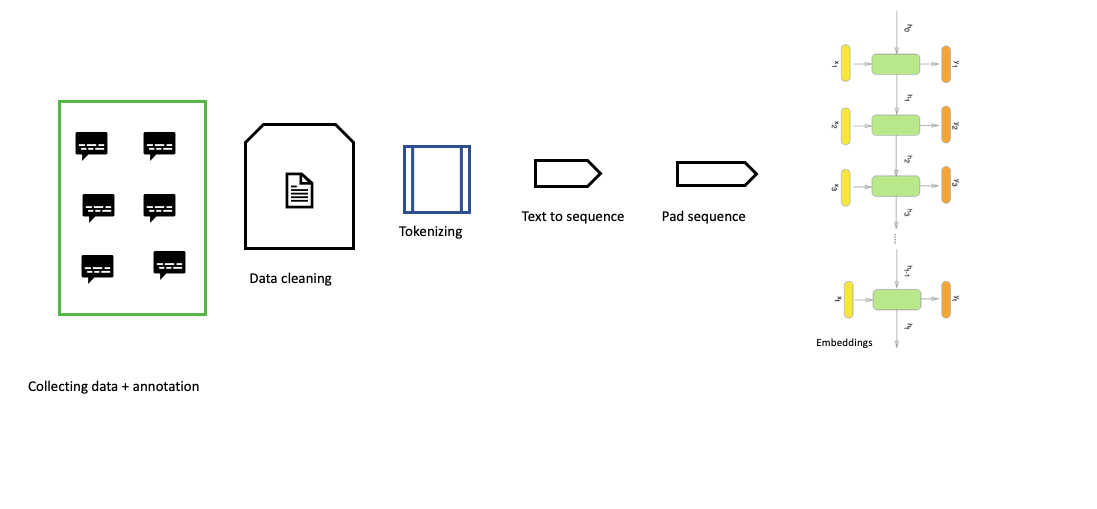

### Tokenizing 

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

text = ['Google Developer groups are groups of amazing people that loves to share and help their communities, These groups are supported bye Google',
        'Developer Student Clubs (DSC) are university based community groups for students interested in Google Developer technologies ']

tokenizer = Tokenizer()

tokenizer.fit_on_texts(text)
print(tokenizer.word_index)


{'groups': 1, 'google': 2, 'developer': 3, 'are': 4, 'of': 5, 'amazing': 6, 'people': 7, 'that': 8, 'loves': 9, 'to': 10, 'share': 11, 'and': 12, 'help': 13, 'their': 14, 'communities': 15, 'these': 16, 'supported': 17, 'bye': 18, 'student': 19, 'clubs': 20, 'dsc': 21, 'university': 22, 'based': 23, 'community': 24, 'for': 25, 'students': 26, 'interested': 27, 'in': 28, 'technologies': 29}


### Texts to sequence

In [ ]:
sequences = tokenizer.texts_to_sequences(text)
print(sequences)


[[2, 3, 1, 4, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1, 4, 17, 18, 2], [3, 19, 20, 21, 4, 22, 23, 24, 1, 25, 26, 27, 28, 2, 3, 29]]


### pad sequence

ولكن لا تزال هناك مشكلة واحدة! ماذا لو كانت بعض التعليقات طويلة بشكل رهيب ، والبعض الآخر كلمة واحدة؟ ألن تبدو الجملة المفهرسة كما يلي:



> التعليق رقم 1: [8،9،3،7،3،6،3،6،3،6،2،3،4،9]


> التعليق رقم 2: [1،2]




وعلينا أن نمرر دفقًا من البيانات ذات طول ثابت (عدد ثابت من الميزات) أليس كذلك؟


> ولهذا السبب نستخدم "padding"!




يمكننا أن نجعل الجمل أقصر طالما أن الآخرين من خلال ملء النقص بالأصفار.
 ولكن من ناحية أخرى ، يتعين علينا أيضًا تقليم تلك الأطول إلى نفس الطول مثل تلك القصيرة. في هذه الحالة ، قمنا بتعيين الحد الأقصى للطول ليكون 250.

In [ ]:
import tensorflow as tf
sequence = [[1,5], [2,1,3], [8,9,4, 5, 6]]
sequence




[[1, 5], [2, 1, 3], [8, 9, 4, 5, 6]]

In [ ]:
tf.keras.preprocessing.sequence.pad_sequences(sequence)


array([[0, 0, 0, 1, 5],
       [0, 0, 2, 1, 3],
       [8, 9, 4, 5, 6]], dtype=int32)

## Applying Tokenizing , Text 2 sequence , Pad sequence to our Training set and test set

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_num_words = 40000
max_length = 250

tokenizer = Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(list(X_train))

list_tokenized_train = tokenizer.texts_to_sequences(X_train)
list_tokenized_test = tokenizer.texts_to_sequences(X_val)

X_tr = pad_sequences(list_tokenized_train, maxlen=max_length)
X_tes = pad_sequences(list_tokenized_test, maxlen=max_length)



NameError: ignored

## Embeddings

**Word Embedding**: A distributed representation of words where different words that have a similar meaning (based on their usage) also have a similar representation.


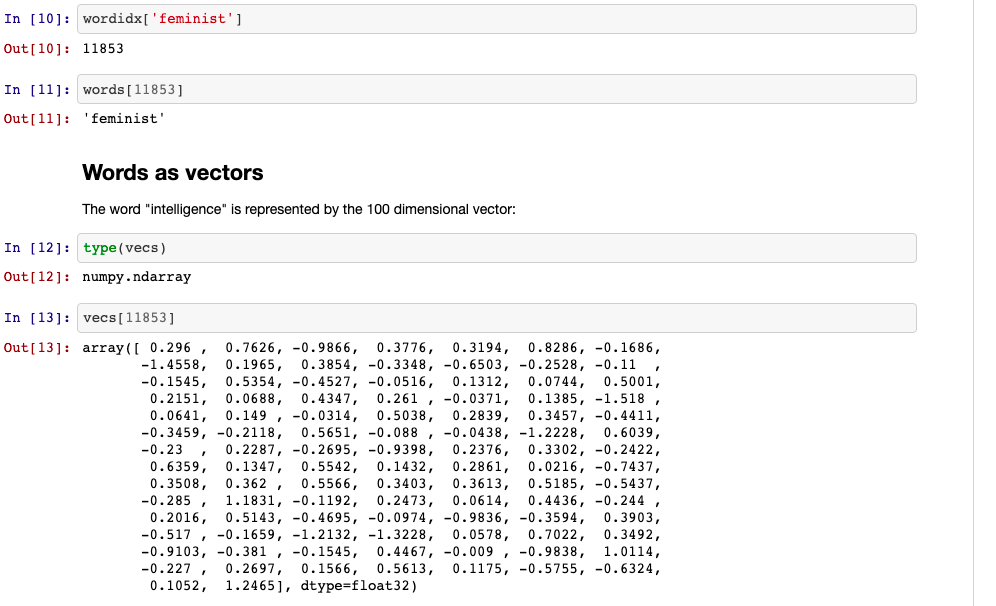

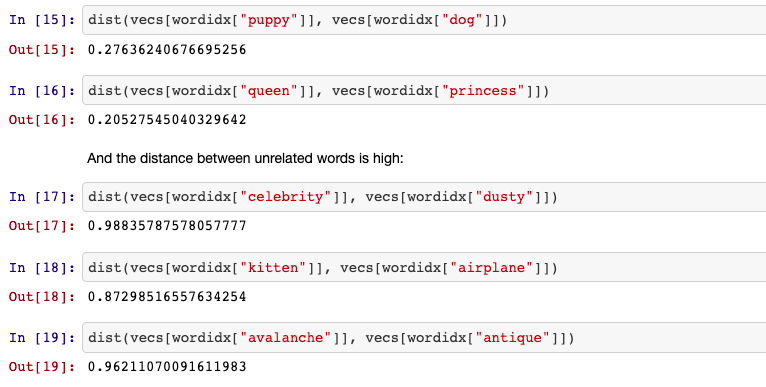

Link: https://github.com/fastai/word-embeddings-workshop/blob/master/Word%20Embeddings.ipynb

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense,Bidirectional,Flatten,GRU ## Neural networks layers 
from tensorflow.keras.models import Sequential


In [ ]:
import tensorflow
print(tensorflow.__version__)

In [ ]:
from tensorflow.keras.optimizers import SGD,RMSprop
opt = RMSprop(lr=0.001)


## Creating our deep learning model

In [ ]:
model=Sequential()
model.add(Embedding(20000, 50, input_length=250)) 

model.add(Bidirectional( LSTM(units=250,return_sequences=True)))



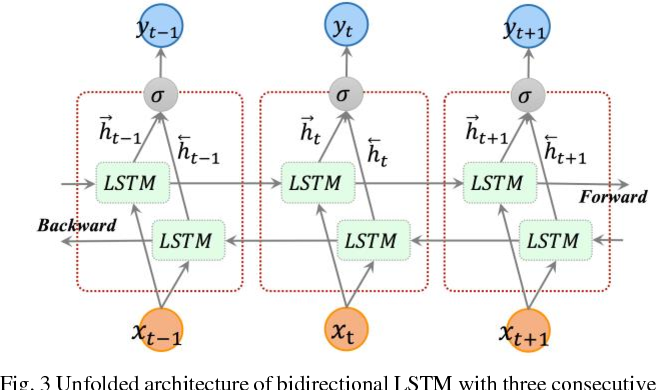

In [ ]:
model.add(Flatten())

model.add(Dense(400, activation='relu'))

# The final ( output ) Layer

model.add(Dense(1, activation='sigmoid')) 



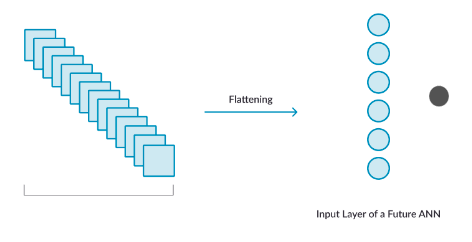

In [ ]:
model=Sequential()
model.add(Embedding(20000, 50, input_length=250)) 

model.add(Bidirectional( LSTM(units=250,return_sequences=True)))

model.add(Flatten())

model.add(Dense(400, activation='relu'))

# The final ( output ) Layer

model.add(Dense(1, activation='sigmoid')) 

# sigmoid : to handle the output ( binary case )

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# binary_crossentropy : because we have a binary classes classification task 
# Adam : Stochastic gradient decenet optimizatiion 
print(model.summary())

history= model.fit(X_tr, y_train, validation_data=(X_tes, y_val), epochs=5,batch_size=132)


## Model Parameters

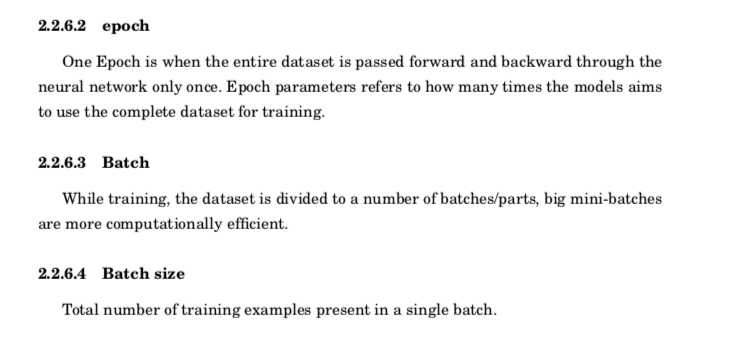

## model Performance on test data

In [ ]:
y_test= model.predict(X_tes)
y_test= np.round(y_test, 0)

print('\t\t\tPERFORMANCE\n')
print('Accuracy:', round(accuracy_score(y_val, y_test), 4), '\n')
print(classification_report(y_val, y_test))
# Calcule la matrice de confusion pour évaluer l'exactitude d'une classification
cmatrix = confusion_matrix(y_val, y_test)